The Cholesky Decomposition :

Theory
Definition: Cholesky Decomposition is applicable to symmetric, positive-definite matrices, decomposing a matrix A into the product:
A=LL^T
where L is a lower triangular matrix.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def manual_cholesky(A):
    n = A.shape[0]
    L = np.zeros_like(A)
    for i in range(n):
        for j in range(i + 1):
            sum_k = np.dot(L[i, :j], L[j, :j])
            if i == j:
                L[i, j] = np.sqrt(A[i, i] - sum_k)
            else:
                L[i, j] = (A[i, j] - sum_k) / L[j, j]
    return L

In [5]:
examples = [
    np.array([[6, 3], [3, 2.1]])
]

In [6]:
for idx, A in enumerate(examples, 1):
    print(f"Example {idx} - Matrix A:")
    print(A)

Example 1 - Matrix A:
[[6.  3. ]
 [3.  2.1]]


In [7]:
L = manual_cholesky(A)
print("Cholesky Lower Matrix L:")
print(L)

Cholesky Lower Matrix L:
[[2.44948974 0.        ]
 [1.22474487 0.77459667]]


In [8]:
reconstructed_A = L @ L.T
print("Reconstructed A (L @ lower tringle):")
print(reconstructed_A)

Reconstructed A (L @ lower tringle):
[[6.  3. ]
 [3.  2.1]]


In [9]:
assert np.allclose(A, reconstructed_A), f"Reconstruction failed for example {idx}"

plt.matshow(L, cmap='viridis') # Heatmap to visualize the L matrix (lower triangular structure)
You could use a darker shade of colour at the lower triangular position and lighter shade of the same at the upper triangular version. That will be a much better representation ig.
And you could also use higher dimension matrices (like say 8 cross 8 or 10 cross 10 or even higher) so that it becomes easier to understand.

Heatmap is for visual understanding that the matrix L is L.T that is all non zero elements are in or below the main diagonal which is a main property of cholesky,
 and if some values are small and vary in scale it will help to highlight those ,
 and color intensity gives magnitude of each element in matrix.

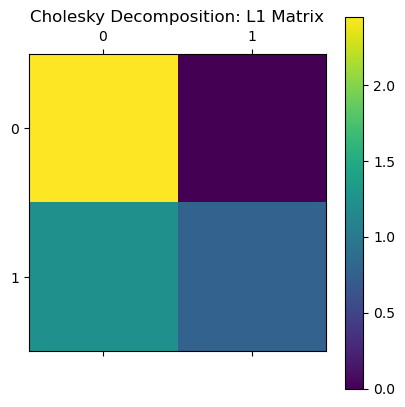

In [10]:
plt.matshow(L, cmap='viridis')
plt.title(f"Cholesky Decomposition: L{idx} Matrix")
plt.colorbar()
plt.show()

In [11]:
examples = [
    np.array([[25, 15, -5], [15, 18, 0], [-5, 0, 11]])
]

In [12]:
for idx, A in enumerate(examples, 2):
    print(f"Example {idx} - Matrix A:")
    print(A)

Example 2 - Matrix A:
[[25 15 -5]
 [15 18  0]
 [-5  0 11]]


In [13]:
L = manual_cholesky(A)
print("Cholesky Lower Matrix L:")
print(L)

Cholesky Lower Matrix L:
[[ 5  0  0]
 [ 3  3  0]
 [-1  1  3]]


In [14]:
reconstructed_A = L @ L.T
print("Reconstructed A (L @ lower tringle):")
print(reconstructed_A)

Reconstructed A (L @ lower tringle):
[[25 15 -5]
 [15 18  0]
 [-5  0 11]]


In [15]:
assert np.allclose(A, reconstructed_A), f"Reconstruction failed for example {idx}"

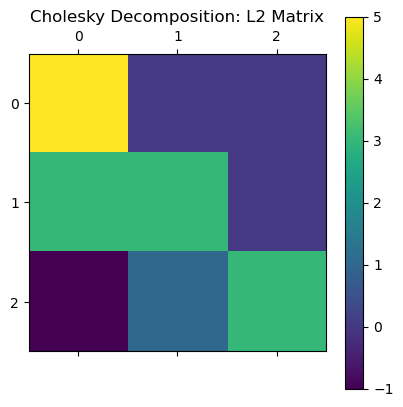

In [16]:
plt.matshow(L, cmap='viridis')
plt.title(f"Cholesky Decomposition: L{idx} Matrix")
plt.colorbar()
plt.show()

In [17]:
examples = [
    np.array([[2.0, 0.5], [0.5, 1.0]])
]

Example 3 - Matrix A:
[[2.  0.5]
 [0.5 1. ]]

Cholesky Lower Matrix L (such that A = L @ lt):
[[1.41421356 0.        ]
 [0.35355339 0.93541435]]

Reconstructed A (L @ L.T):
[[2.  0.5]
 [0.5 1. ]]


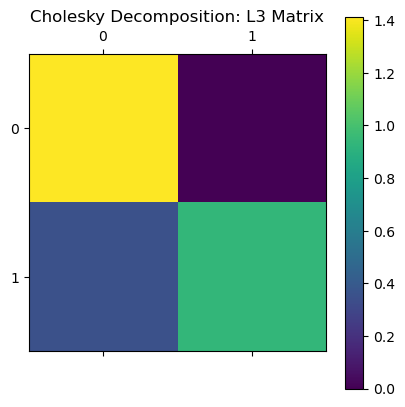

In [18]:
for idx, A in enumerate(examples, 3):
    print(f"Example {idx} - Matrix A:")
    print(A)

    #Perform Cholesky decomposition
    L = manual_cholesky(A)
    print("\nCholesky Lower Matrix L (such that A = L @ lt):")
    print(L)

    #Reconstruct A from L to verify correctness
    
    reconstructed_A = L @ L.T
    print("\nReconstructed A (L @ L.T):")
    print(reconstructed_A)

    #Check reconstruction accuracy
    
    assert np.allclose(A, reconstructed_A), f"Reconstruction failed for example {idx}"

    #Visualize the matrix
    
    plt.matshow(L, cmap='viridis')
    plt.title(f"Cholesky Decomposition: L{idx} Matrix")
    plt.colorbar()
    plt.show()


This method is a special case of LU decomposition, optimized for symmetric positive-definite matrices. It is often preferred for its numerical stability and efficiency.

Computational Aspects:
- Complexity: O(n³), but with reduced constants due to symmetry.
- Faster than LU or QR for symmetric matrices.
- Storage efficient: only the lower triangle needs to be stored or computed.

Applications:
- Portfolio optimization (inverting covariance matrices).
- Monte Carlo simulation (correlated asset paths).
- Efficient for solving large linear systems where covariance matrices are involved.
 (inverting covariance matrices).
- Monte Carlo simulation (correlated asset paths).